In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import statsmodels.stats as stats

In [2]:
data=pd.read_csv('c4w43_ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [10]:
data.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


### 1 Задача

In [9]:
(sum(data[data.slot=='exp'].n_clicks)-sum(data[data.slot!='exp'].n_clicks))/sum(data[data.slot!='exp'].n_clicks)

0.016135689824415808

In [14]:
data[data.slot=='exp'].n_clicks.mean() , data[data.slot=='control'].n_clicks.mean()

(11.584000994388806, 11.280906260323173)

In [15]:
data[data.slot=='exp'].n_clicks.median() , data[data.slot=='control'].n_clicks.median()

(5.0, 4.0)

для средних доверительный интервал:

In [16]:
from statsmodels.stats import weightstats

In [17]:
weightstats.zconfint(data[data.slot=='exp'].n_clicks)

(11.509318729588346, 11.658683259189266)

In [20]:
weightstats.zconfint(data[data.slot=='control'].n_clicks)

(11.20638556317892, 11.355426957467426)

бутстреп

In [39]:
np.random.seed(0)
n_boot_samples = 500
exp1=np.array(data[data.slot=='exp'].n_clicks)
control1=np.array(data[data.slot=='control'].n_clicks)
ind_exp=np.random.randint(0,len(exp1),(n_boot_samples,len(exp1)))
exp=pd.DataFrame(exp1[ind_exp])
ind_control=np.random.randint(0,len(control1),(n_boot_samples,len(control1)))
control=pd.DataFrame(control1[ind_control])

In [40]:
print('default=0: 95% interval median: ',np.percentile(np.array(exp.median(axis=1)),[2.5,97.5]))
print('default=1: 95% interval median: ',np.percentile(np.array(control.median(axis=1)),[2.5,97.5]))
print('difference: 95% interval median: ',np.percentile(np.array(exp.median(axis=1)-control.median(axis=1)),[2.5,97.5]))

default=0: 95% interval median:  [5. 5.]
default=1: 95% interval median:  [4. 4.]
difference: 95% interval median:  [1. 1.]


In [42]:
print('default=0: 95% interval mean: ',np.percentile(np.array(exp.mean(axis=1)),[2.5,97.5]))
print('default=1: 95% interval mean: ',np.percentile(np.array(control.mean(axis=1)),[2.5,97.5]))
print('difference: 95% interval mean: ',np.percentile(np.array(exp.mean(axis=1)-control.mean(axis=1)),[2.5,97.5]))

default=0: 95% interval mean:  [11.50789349 11.6588664 ]
default=1: 95% interval mean:  [11.20668696 11.35347509]
difference: 95% interval mean:  [0.19960335 0.40496719]


4 Задача

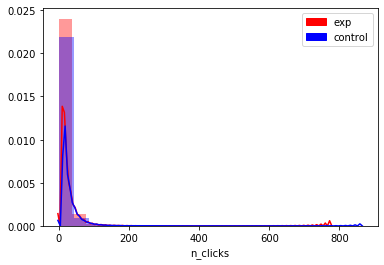

In [38]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
sns.distplot(data[data.slot=='exp'].n_clicks, hist=True, color='red', bins=20 )
sns.distplot(data[data.slot=='control'].n_clicks, hist=True, color='blue', bins=20 )

red_patch = mpatches.Patch(color='red', label='exp')
blue_patch = mpatches.Patch(color='blue', label='control')
plt.legend(handles=[red_patch,blue_patch])

In [51]:
#control_boot_chi_squared
temp1,temp2=sc.stats.chisquare(np.array(control),ddof=1, axis=1)
np.shape(temp2)

(500,)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

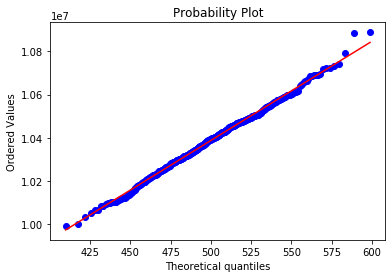

In [56]:
res=sc.stats.probplot(temp1, dist="chi2", 
                     sparams=(len(temp1)-1), plot=plt)

((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

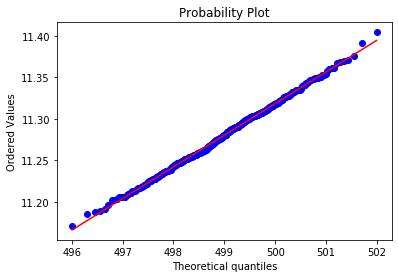

In [61]:
sc.stats.probplot(np.array(control.mean(axis=1)),dist="norm",sparams=(len(temp1)-1), plot=plt)

In [62]:
data[data.slot=='exp'].n_clicks

0         23
1          3
2         29
4         54
6          6
          ..
566125     0
566126     0
566127     4
566130     4
566133     3
Name: n_clicks, Length: 281580, dtype: int64

5 Задача

In [77]:
exp=data[data.slot=='exp'].pivot_table(values='n_clicks',index=['userID'], aggfunc='sum')
control=data[data.slot=='control'].pivot_table(values='n_clicks',index=['userID'], aggfunc='sum')
exp.mean(), control.mean()

(n_clicks    11.589352
 dtype: float64,
 n_clicks    11.287332
 dtype: float64)

In [78]:
from scipy.stats import mannwhitneyu

In [110]:
mannwhitneyu(exp, control)

MannwhitneyuResult(statistic=2547597959.5, pvalue=0.2574055152210032)

6 Задача

In [95]:
browsers=np.array(data.browser.unique())
browsers

array(['Browser #2', 'Browser #4', 'Browser #14', 'Browser #17',
       'Browser #20', 'Browser #22'], dtype=object)

In [104]:
for i in browsers:
    print(i)
    exp=data[(data.slot=='exp')& (data.browser==i)].pivot_table(values='n_clicks',index=['userID'], aggfunc='sum')
    control=data[(data.slot=='control')& (data.browser==i)].pivot_table(values='n_clicks',index=['userID'], aggfunc='sum')
    #print(exp.mean(), control.mean())
    print(mannwhitneyu(exp, control))

Browser #2
MannwhitneyuResult(statistic=1522572720.0, pvalue=0.0272438604197241)
Browser #4
MannwhitneyuResult(statistic=3072447765.0, pvalue=0.40760617658454984)
Browser #14
MannwhitneyuResult(statistic=806984730.5, pvalue=0.0)
Browser #17
MannwhitneyuResult(statistic=131389681.0, pvalue=0.03740060143010802)
Browser #20
MannwhitneyuResult(statistic=143791805.0, pvalue=0.45366656388735377)
Browser #22
MannwhitneyuResult(statistic=2547597959.5, pvalue=0.2574055152210032)


7 Задача

In [108]:
temp3=data.pivot_table(values=['n_queries','n_nonclk_queries'],index=['browser','slot'], aggfunc='sum')
temp3['pen']=temp3['n_nonclk_queries']/temp3['n_queries']

In [109]:
temp3

n_nonclk_queries  n_queries       pen
browser     slot                                          
Browser #14 control            161252     279998  0.575904
            exp                123656     282606  0.437556
Browser #17 control             75837     208921  0.362994
            exp                 77614     210123  0.369374
Browser #2  control            260259     566239  0.459627
            exp                246514     548019  0.449827
Browser #20 control             78548     193752  0.405405
            exp                 72998     187283  0.389774
Browser #22 control            315470     777135  0.405940
            exp                296177     743156  0.398539
Browser #4  control            498254    1060771  0.469709
            exp                456508    1011250  0.451429

In [111]:
#ответ 4